# Data Science Residency Interview Assignment
Completed by: Heather Moorhead.

Data: Supplied by Palindrome Data (104 rows and 9 columns).

Completed as part of the Data Science Residency 2022 interview process.

Time taken to complete: 45 mins.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
df = pd.read_excel("palindrome_data.xlsx", header=1)
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [3]:
df.shape

(104, 9)

In [4]:
df.describe

<bound method NDFrame.describe of                      District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.2559

**Q1 What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?**

In [5]:
#Isolate the survey estimates and then add all values in the NoPLHIV column.
survey_est = df[df['Estimate'] == "Survey"]
survey_est.head(5)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534
2,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985
4,West Coast,DC1,Survey,2.7,0.000,5.444,11302,0,22789
6,Cacadu,DC10,Survey,7.6,3.484,11.716,34732,15922,53542
8,Amatole,DC12,Survey,11.0,7.276,14.724,98884,65407,132361


In [6]:
print("The total number of people living with HIV in the listed districts as per the survery estimate is " + str(survey_est['NoPLHIV'].sum()))

The total number of people living with HIV in the listed districts as per the survery estimate is 6409903


**Q2 What is the average NoPLHIV of the two estimates used for “Xhariep”?**

In [7]:
#Isolate the data for district Xhariep then get the average of the NoPLHIV column.
xhariep = df[df["District"]=="Xhariep"]
xhariep.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
16,Xhariep,DC16,Survey,8.30000,6.144000,10.456000,11777,8718,14836
17,Xhariep,DC16,Fay-Heriott,8.96307,7.187823,11.124214,12718,10199,15784


In [8]:
print("The average estimate for the number of people living with HIV in Xhariep is " + str(xhariep['NoPLHIV'].mean()))

The average estimate for the number of people living with HIV in Xhariep is 12247.5


**Q3 Add a column and populate it with the number of people not living with HIV for each row.**

In [9]:
# I took "NoPLHIV" divided by "prevalence_%" to get 1% of the district's population. I multiplied that by 100 
# to get 100% of the districts population (including both HIV positive and HIV negative individuals).
# I took the 100% of the population value and I subtracted the number of people living with HIV ("NoPLHIV").

df['Not_living_with_HIV'] = ((df['NoPLHIV']/df['Prevalence_%'])*100 - df['NoPLHIV']).astype(int)
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Not_living_with_HIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,407290


**Q4 What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)?**

In [10]:
city= df[df["District"].str.contains('City|Metro')]
city.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Not_living_with_HIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,4127739


In [11]:
print("The total number of people living with HIV in all cities is", str(city['NoPLHIV'].sum()))

The total number of people living with HIV in all cities is 2572733


**Q5 Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output.**

In [12]:
cols=df.columns.to_list()
clean_cols=[]
for col in cols:
    col=re.sub("[%_]","",col)
    clean_cols.append(col)
clean_cols

['District',
 'Code',
 'Estimate',
 'Prevalence',
 'PrevalenceLCL',
 'PrevalenceUCL',
 'NoPLHIV',
 'NoPLHIVLCL',
 'NoPLHIVUCL',
 'NotlivingwithHIV']

**Q6 Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph.**

In [13]:
district_df= df[df["District"].str.endswith("i")]
district_df =(district_df[district_df['Estimate'] == "Fay-Heriott"])
district_df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Not_living_with_HIV
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,690049
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,312342
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,455346
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,421156
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321,1442869


<ipython-input-14-4f03e2d20348>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


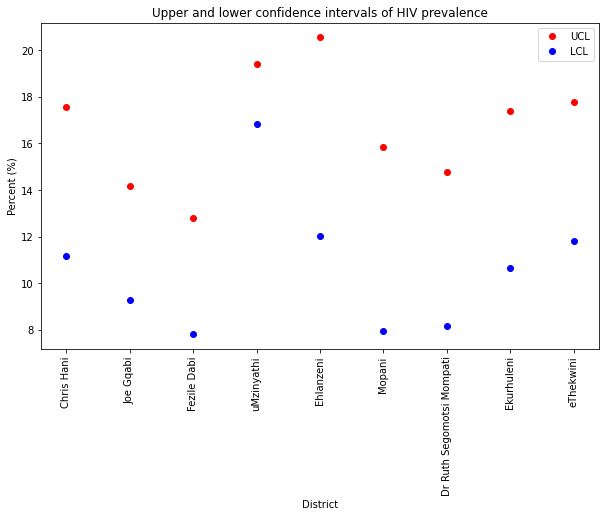

In [14]:
x= district_df['District']
y1=district_df['Prevalence_LCL']
y2=district_df['Prevalence_UCL']

fig=plt.figure()
fig.show()
ax=fig.add_subplot()
fig.set_size_inches(10, 6)
ax.plot(x,y2,c='r',marker="o",label='UCL', ls='')
ax.plot(x,y1,c='b',marker="o",label='LCL', ls='')
plt.title("Upper and lower confidence intervals of HIV prevalence")
plt.xlabel("District")
plt.xticks(rotation=90)
plt.ylabel("Percent (%)")
plt.legend(loc='upper right')
plt.draw()